In [6]:
# Importing the relevant python libraries for FFT

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq, fftshift


rng = np.random.default_rng()

In [17]:
def euler_maruyama(A0, omega, D, x0, t, h):
    
    '''
    Simple numerical solution to SDE of bistable system with periodic time-dependent forcing.
    
    Parameters
    -----------
    A0: forcing amplitude

    omega: forcing frequency
    
    D: diffusion coefficient

    -----------
    '''
                                                                                             # Here dt = h
    x = np.zeros_like(t, dtype="float")                                                      # Create array of zeroes of length N

    #Set initial value of x
    x[0] = x0        

    #Calculate delta x for the N steps
    for r in range(len(x)-1):
        dW = np.sqrt(h) * rng.normal(0, 1)   

        x[r + 1] = x[r] + (x[r] - x[r]**3 + A0*np.cos(omega*t[r]))* h + np.sqrt(2*D) * dW    # Replace x with x+ delta x
                   
    return x


In [18]:
def S_peak(D, omega):

    
    T = 4000
    h = 0.1
    N = int(T/h)
    t = np.linspace(0, T, N)
    sample_paths = 10

    paths = np.empty(shape = (sample_paths, N))
    for r in range(sample_paths):
        paths[r] = euler_maruyama(A0 = 0.2, omega = omega, D = D, x0 = 0, t = t, h = h)
    # Now we perform the FFT for each of these paths to find dominant frequencies and store them into a new variabole

    FFT_paths = np.empty_like(paths, dtype = "complex")
    path_number = 0
    for path in paths:
        FFT_paths[path_number] = fft(path, norm ='forward')
        path_number +=1

    #Getting the frequencies
    n = np.arange(-N/2,N/2,1)   # Generate the n

    # As we have f = n / tN, and w = 2pif = 2pi n/Tn, we have
    w = np.pi * n / T
    
    # Now we compute the energy spectral density for each one of the paths
    S_n_paths = np.real(FFT_paths * np.conjugate(FFT_paths))

    
    # We make an average of the 10 Energy spectral densities
    Sn_mean = np.mean(S_n_paths, axis = 0)


    
    # We take only the positive frequencies here
    half_w = int(len(w)/2)
    positive_w = w[half_w:]
    
    # We shift to the zero frequency and then take only the energy densities corresponding to the positive frequencies
    positive_Sn = fftshift(Sn_mean)[half_w:] 
    
    old_Sn = 0
   
    # Find the highest peak
    for i in positive_Sn:
        if i > old_Sn:
            old_Sn = i
               

    return old_Sn
    

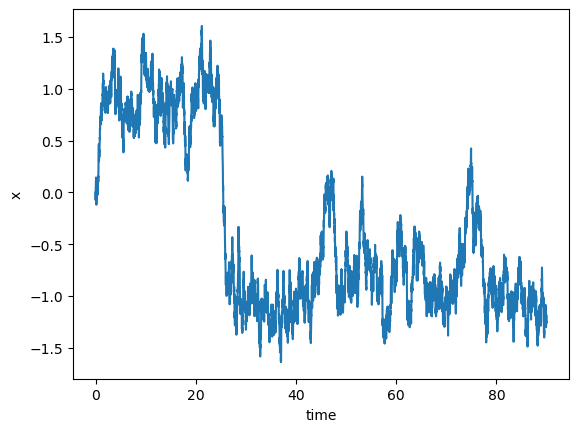

In [19]:
T = 90
h = 0.01
N = int(T/h)
t = np.linspace(0, T, N)

x = euler_maruyama(A0 = 0.2, omega=0.1, D =0.1, x0 = 0, t = t, h = h)
plt.plot(t, x)
plt.xlabel('time')
plt.ylabel('x');

In [20]:
#Generating 10 sample paths with T = 4000

T = 4000
h = 0.01
N = int(T/h)
t = np.linspace(0, T, N)
sample_paths = 10

paths = np.empty(shape = (sample_paths, N))
for r in range(sample_paths):
    paths[r] = euler_maruyama(A0 = 0.2, omega=0.1, D =0.1, x0 = 0, t = t, h = h)

In [21]:
# Now we perform the FFT for each of these paths to find dominant frequencies and store them into a new variabole

FFT_paths = np.empty_like(paths, dtype = "complex")
path_number = 0
for path in paths:
    FFT_paths[path_number] = fft(path, norm ='forward')
    path_number +=1

In [22]:
# Now we compute the energy spectral density for each one of the paths
S_n_paths = np.real(FFT_paths * np.conjugate(FFT_paths))

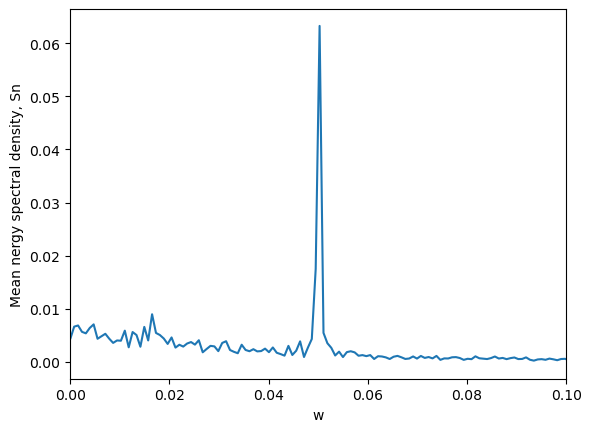

In [23]:

#Getting the frequencies
n = np.arange(-N/2,N/2,1)   # Generate the n

# As we have f = n / tN, and w = 2pif = 2pi n/Tn, we have
w = np.pi * n / T

# We make an average of the 10 Energy spectral densities
Sn_mean = np.mean(S_n_paths, axis = 0)

plt.plot(w, fftshift(Sn_mean))
plt.xlabel('w')
plt.ylabel('Mean nergy spectral density, Sn')
plt.xlim(0,0.1);

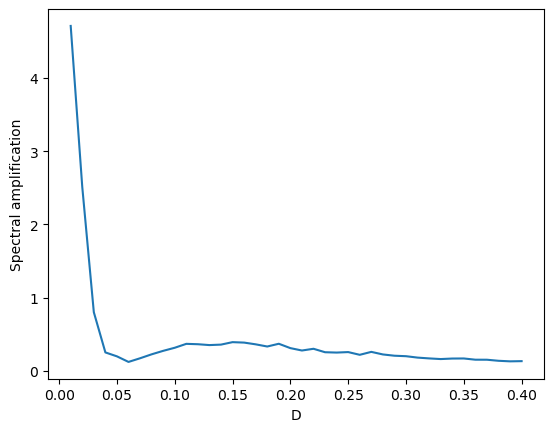

In [24]:
D_values = np.linspace(0.01,0.4,num = 40)
Speak = np.empty_like(D_values)

index = 0    #Index for the peaks
for D in D_values:
    Speak[index] = S_peak(D, omega = 0.1)
    index += 1

#Computing spectral amplification eta

eta = Speak/0.2
plt.plot(D_values, eta)
plt.xlabel('D')
plt.ylabel('Spectral amplification');

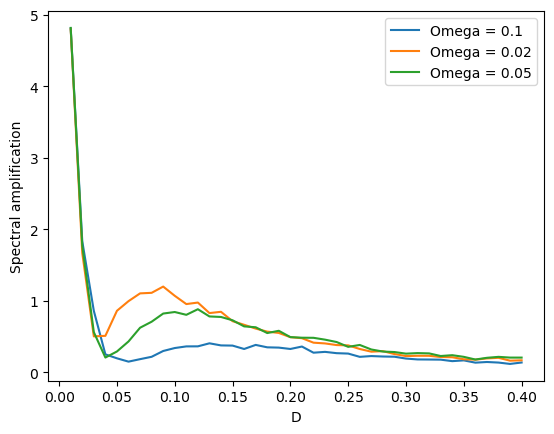

In [25]:
Speak01 = np.empty_like(D_values)    # Omega = 0.1

index = 0    #Index for the peaks
for D in D_values:
    Speak01[index] = S_peak(D, omega = 0.1)
    index += 1

Speak002 = np.empty_like(D_values)    # Omega = 0.02

index = 0    #Index for the peaks
for D in D_values:
    Speak002[index] = S_peak(D, omega = 0.02)
    index += 1

Speak005 = np.empty_like(D_values)    # Omega = 0.05

index = 0    #Index for the peaks
for D in D_values:
    Speak005[index] = S_peak(D, omega = 0.05)
    index += 1
eta01 = Speak01/0.2
eta002 = Speak002/0.2
eta005 = Speak005/0.2
plt.plot(D_values, eta01, label = "Omega = 0.1")
plt.plot(D_values, eta002, label = "Omega = 0.02")
plt.plot(D_values, eta005, label = "Omega = 0.05")
plt.xlabel('D')
plt.ylabel('Spectral amplification')
plt.legend();